###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
# [INSIRA CÓDIGO AQUI]
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn

Obs: iremos considerar a variável de saída: **Life expectancy**

In [ ]:
# [INSIRA CÓDIGO AQUI]
data = pd.read_csv('/content/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###2. Análise exploratória
Faça uma exploração dos dados do dataset, procurando verificar:

a) quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;

In [ ]:
# [INSIRA CÓDIGO AQUI]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

b) as informações estatísticas básicas das colunas do dataset;

In [ ]:
# [INSIRA CÓDIGO AQUI]
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


c) se há dados faltantes e decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas as colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


In [ ]:
# [INSIRA CÓDIGO AQUI]
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
#dropando as colunas com mais de 500 dados faltantes
colunas_drop = data.columns[data.isna().sum() > 500].tolist()
data = data.drop(colunas_drop, axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dd68a0950>,
      dtype=object)

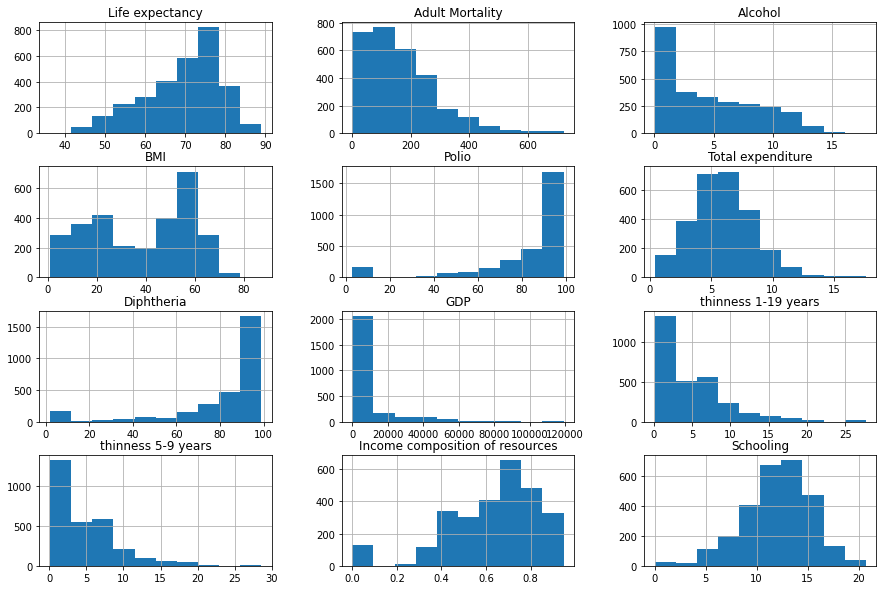

In [ ]:
cols = data.columns[[i > 0  for i in data.isnull().sum()]]
data[cols].hist(bins=10, figsize=(15, 10))

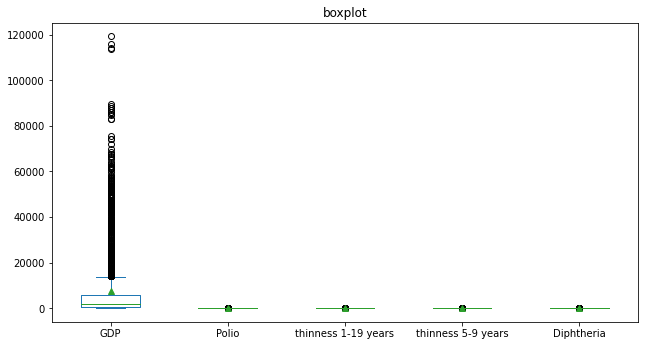

In [ ]:
colunas_boxplot = ['GDP', 'Polio', 'thinness 1-19 years', 'thinness 5-9 years', 'Diphtheria']
plt.rcParams["figure.figsize"] = [10.50, 5.50]
ax = data[colunas_boxplot].plot(kind='box', title='boxplot', showmeans=True)

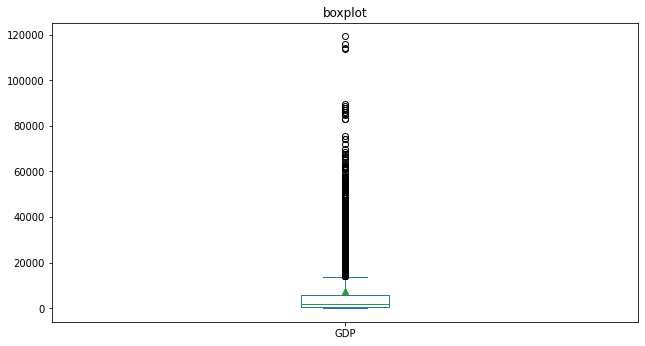

In [ ]:
ax = data['GDP'].plot(kind='box', title='boxplot', showmeans=True)

In [ ]:
#Removendo dados com nosso target nulo
data = data[data['Life expectancy'].notna()]
data['Life expectancy'].isna().sum()

0

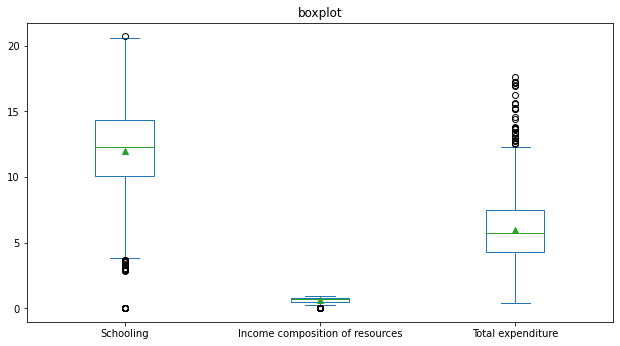

In [ ]:
colunas_boxplot = ['Schooling', 'Income composition of resources', 'Total expenditure']
plt.rcParams["figure.figsize"] = [10.50, 5.50]
ax = data[colunas_boxplot].plot(kind='box', title='boxplot', showmeans=True)

In [ ]:
# As colunas Schooling, Income composition of resources, Total expenditure seguem uma distribuição que se aproxima de uma normal
# Para essas colunas, vamos substituir os valores faltantes pela média, pelo box plot, podemos
# Analisar que o volume de outlier não foi tão significativo para alterar a média,
# tomando cuidado maior com Total expenditure
colunas_media = ['Schooling', 'Income composition of resources', 'Total expenditure']
_ = [data[c].fillna(data[c].mean(), inplace=True) for c in colunas_media]
data[colunas_media].isnull().sum()

Schooling                          0
Income composition of resources    0
Total expenditure                  0
dtype: int64

In [ ]:
colunas_moda = data.columns[data.isna().any()].tolist()
_ = [data[c].fillna(data[c].mode()[0], inplace=True) for c in colunas_moda]
data[colunas_moda].isnull().sum()

Alcohol                0
BMI                    0
Polio                  0
Diphtheria             0
GDP                    0
thinness 1-19 years    0
thinness 5-9 years     0
dtype: int64

In [ ]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

d) a matriz de correlação das entradas com a saída;

In [ ]:
corr_matrix= data.corr()
corr_matrix['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.718614
Income composition of resources    0.692621
BMI                                0.546055
Diphtheria                         0.471215
Polio                              0.457395
GDP                                0.429103
percentage expenditure             0.381864
Alcohol                            0.370490
Total expenditure                  0.209628
Year                               0.170033
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.453710
thinness 1-19 years               -0.459441
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64

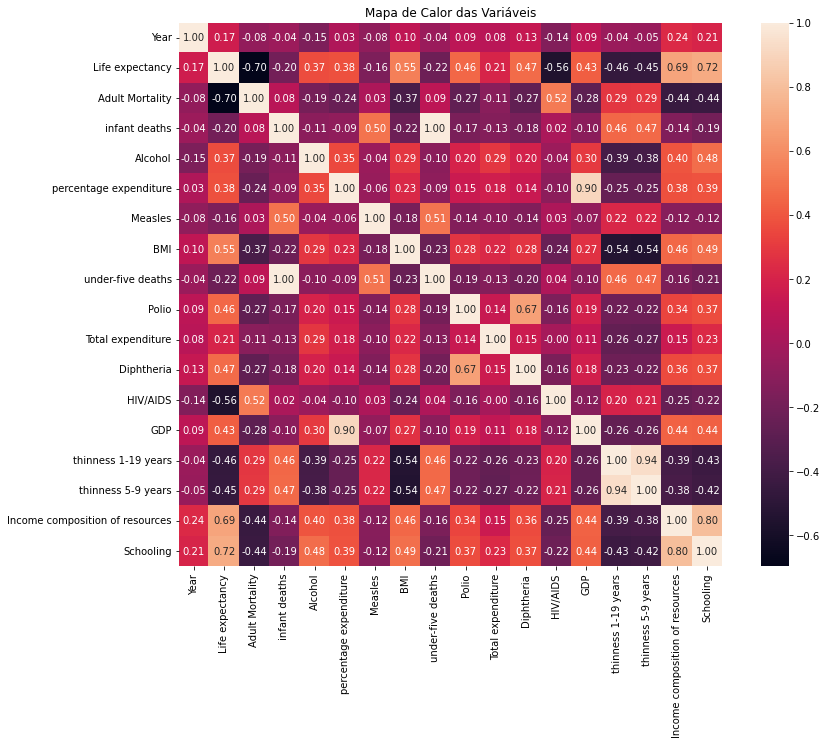

In [ ]:
# [INSIRA CÓDIGO AQUI]
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(), fmt='.2f', square = True, linecolor = "white", annot= True)
plt.title("Mapa de Calor das Variáveis")
plt.show()

In [ ]:
data_status = pd.get_dummies(data[['Status']])
data = pd.concat([data, data_status], axis=1)
data = data.drop(['Status'], axis=1)

In [ ]:
categ = ['Country']

# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,0,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,...,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0,1
1,0,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,...,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,0,1
2,0,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,...,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,0,1
3,0,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,...,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,0,1
4,0,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,...,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,0,1


e) quais as features que mais possuem correlação (negativa ou positivamente) com a saída?

In [ ]:
# escreva um texto com sua resposta
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

# CORRELAÇÃO POSITIVA - QUANDO UM VALOR AUMENTA
# O OUTRO TAMBÉM AUMENTA
# Schooling - 0.718614thinness
# Income composition of resources - 0.692621

# CORRELAÇÃO NEGATIVA - QUANDO UM VALOR AUMENTA
# O OUTRO DIMINUI
# HIV/AIDS - 0.556556
# Adult Mortality - 0.696359

f) com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

In [ ]:
# escreva o nome das features redundantes
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

# REDUNDANTES:
# thinness 5-9 years 0.94 com thinness 1-19 years        
# GDP 0,9 com percentage expenditure   

g) com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

In [ ]:
# escreva o nome da feature redundante que você removeria
# justificando o porquê nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário



# GDP                                0.429103
# percentage expenditure             0.381864

# Eu removeria GDP, que apesar de ter correlação maior com a saída,  possui 
# mais de 400 valores faltantes e alta correlação, enquanto que
# percentage expenditure que não possui nenhum valor faltante.
# Além disso, através do boxplot foi possível verificar que a coluna GDP possui
# muitos outliers com valores que alteram significativamente a distribuição.

h) com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

In [ ]:
# escreva um texto com sua resposta
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

# O dataset fornece condições para prever a variável de saída, os dados
# possuem uma correlação com um valor aceitável com a nossa variável target
# por exemplo, o menor valor de correlação positiva é Year e tem 
# valor de 0.170033 de correlação

In [ ]:
#Como considerado das observações acima, a coluna GDP será dropada
data.drop(['GDP'], axis=1, inplace=True)

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [ ]:
y = data['Life expectancy']
X = data.drop(['Life expectancy'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [ ]:
# [INSIRA CÓDIGO AQUI]
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

###5. Execute a Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [ ]:
# [INSIRA CÓDIGO AQUI]
model = LinearRegression().fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

###6. Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

#### 6.1 Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

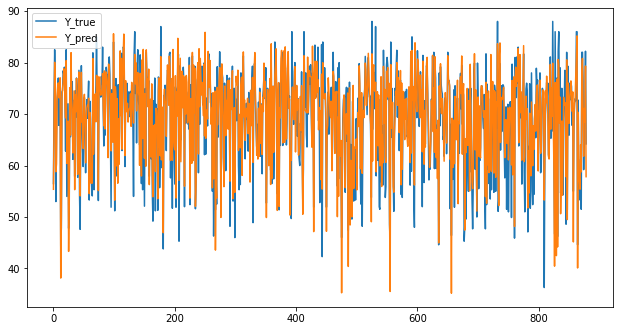

In [ ]:
# [INSIRA CÓDIGO AQUI]
plt.plot(range(len(y_test)), y_test, label='Y_true')
plt.plot(range(len(y_test)), y_pred, label='Y_pred')
plt.legend()
plt.show()

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

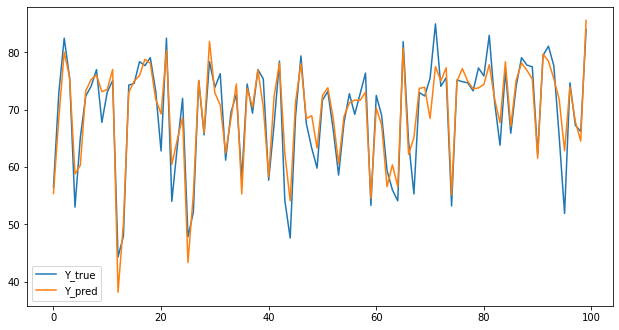

In [ ]:
# [INSIRA CÓDIGO AQUI]
n_samples = 100
plt.plot(range(n_samples), y_test[0:n_samples], label='Y_true')
plt.plot(range(n_samples), y_pred[0:n_samples], label='Y_pred')
plt.legend()
plt.show()

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito).

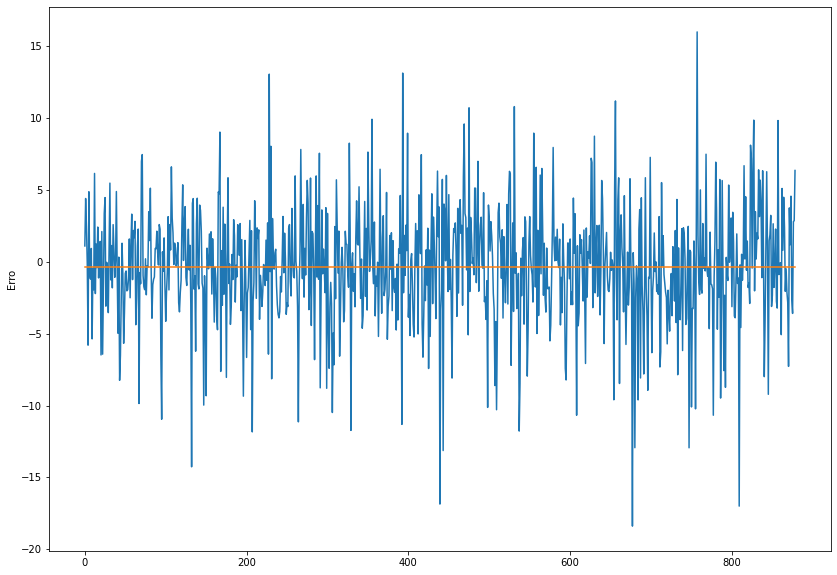

In [ ]:
# [INSIRA CÓDIGO AQUI]
error = np.array(y_test) - y_pred
plt.figure(figsize = (14,10))
plt.plot(range(len(error)), error)
plt.ylabel('Erro')
mean_diff = [np.mean(y_test - y_pred)] * len(error)
plt.plot(range(len(error)), mean_diff, label='error')

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

In [ ]:
# escreva um texto com sua resposta
# nesse espaço aqui, lembrando de
# deixar caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

# O modelo se adaptou bem aos dados durante o treinamento e durante a validação
# foi possível perceber que o modelo conseguiu entender as tendências dos dados 
# e realizar predições consistentes de acordo com o gráfico

####6.2 Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (RMSE e R2) e verifique se sua impressão visual se confirma.

In [ ]:
# [INSIRA CÓDIGO AQUI]
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2: ", r2)
print("Root Mean Squared Error: ", rmse)

R2:  0.8199741635287904
Root Mean Squared Error:  4.1003287048404


In [ ]:
# escreva um texto justificando se sua
# impressão visual se confirmou ou não
# nesse espaço aqui, lembrando de deixar
# caracteres '#' no inicio de cada linha
# para que essa célula seja considerada comentário

# O modelo obteve um bom resultado e a impressão visual se confirmou, o
# a raiz quadrada do erro médio quadrático ficou com um valor baixo:
# Root Mean Squared Error:  4.10.
# Como o RMSE considera erros ao quadrado, se houver um erro muito alto
# ele vai ser penalizado com maior valor, como o valor foi baixo, foi possível
# concluir que as previsões não ficaram muito distante do valor correto.

# Avaliando o R2, temos um valor de 0.82, com um valor máximo de 1,esse valor
# mostra que nossas predições se ajustaram bem, considerando que quanto maior
# o valor melhor o modelo ajusta aos dados.

####6.3 Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [ ]:
# [INSIRA CÓDIGO AQUI]
model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=10)
scores.mean()

0.8128722651115723